<a href="https://colab.research.google.com/github/Bigguysahaj/NLP-College/blob/main/NLP_assignment_1_sahaj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assginment - 1**

**Aim :** To Clean and preprocess text data in Pandas for NLP tasks and generate the significant tokens as a result.

### **Paragraph**:
```
“ We all the students of KCCITM .
Studying here is fun!
None
The career of pursuing Btech is always outstanding and wonderful.
We are working here hard to achieve our goal.”

```


## Setting up required Libraries and Primary Text



In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string

%matplotlib inline

In [60]:
primary_text = """ We all the students of KCCITM .
Studying here is fun!
None
The career of pursuing Btech is always outstanding and wonderful.
We are working here hard to achieve our goal. """

### Load the Data into a Pandas DataFrame


First step is loading the text in a dataframe.


Each row not represents a separate line and we can easily get rid of Non-consequential rows.

In [61]:
text_data = primary_text.split('\n')

df = pd.DataFrame({'text': text_data})
df.head()

,text
0,We all the students of KCCITM .
1,Studying here is fun!
2,None
3,The career of pursuing Btech is always outstan...
4,We are working here hard to achieve our goal.


### Handle Missing Values

From inspecting the above table, we **don't** have any missing values. But there are rows consisting of single words. "None" or "" should not be classified as meaningful tokens as they don't add anything to the meaning of our primary text.

Similarly I find it hard to imagine any single worded sentences adding any meaning to our primary text either, so I would choose to get rid of them too (but it's not applicable here).

In [62]:
# Reasoning: Empty strings and 'None' don't provide useful information.
df['text'] = df['text'].replace(['', 'None'], pd.NA)
df = df.dropna()

# Reasoning: Neither do I expect any single word sentences to add key information. (Won't have any effect here)
df = df[df['text'].str.split().apply(len) > 1]

df = df.reset_index(drop=True)

df.head()

,text
0,We all the students of KCCITM .
1,Studying here is fun!
2,The career of pursuing Btech is always outstan...
3,We are working here hard to achieve our goal.


### Normalise the Text to make it consistent :

Lowercasing the text and replacing any whitespaces.

In [63]:
def normalize_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['normalized_text'] = df['text'].apply(normalize_text)
df['normalized_text'].head()

,normalized_text
0,we all the students of kccitm .
1,studying here is fun!
2,the career of pursuing btech is always outstan...
3,we are working here hard to achieve our goal.


### Remove Noise:

Removing punctuation, numbers and non ascii values althought they won't be an issue here.

In [64]:
def remove_noise(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove non ascii
    text = text.encode('ascii', 'ignore').decode('utf-8')
    return text

df['cleaned_text'] = df['normalized_text'].apply(remove_noise)
df['cleaned_text']

,cleaned_text
0,we all the students of kccitm
1,studying here is fun
2,the career of pursuing btech is always outstan...
3,we are working here hard to achieve our goal


### Tokenize the Text

In [65]:
def simple_tokenize(text):
    return text.split()

df['tokens'] = df['cleaned_text'].apply(simple_tokenize)
df['tokens'].head()

,tokens
0,"[we, all, the, students, of, kccitm]"
1,"[studying, here, is, fun]"
2,"[the, career, of, pursuing, btech, is, always,..."
3,"[we, are, working, here, hard, to, achieve, ou..."


### Remove Stop Words

For this, I downloaded a list of english stop words form `https://countwordsfree.com/stopwords`.


After that, I will take the list of tokens from each row and just remove the the stop words by cross refrencing from our stop-words list.

In [66]:
def load_stop_words(file_path):
    with open(file_path, 'r') as file:
        stop_words = set(word.strip() for word in file)
    return stop_words

stop_words = load_stop_words('stop_words_english.txt')
print(list(stop_words)[:5])

['eg', 'section', 'mill', 'its', 'affects']


In [67]:
def remove_tokens(tokens, stop_words):
  return [token for token in tokens if token not in stop_words]

df['filtered_tokens'] = df['tokens'].apply(lambda tokens: remove_tokens(tokens, stop_words))
df['filtered_tokens'].head()

,filtered_tokens
0,"[students, kccitm]"
1,"[studying, fun]"
2,"[career, pursuing, btech, outstanding, wonderful]"
3,"[working, hard, achieve, goal]"


That is the most significant difference I have seen through the process. I would like to visualise the difference here to see what happened.

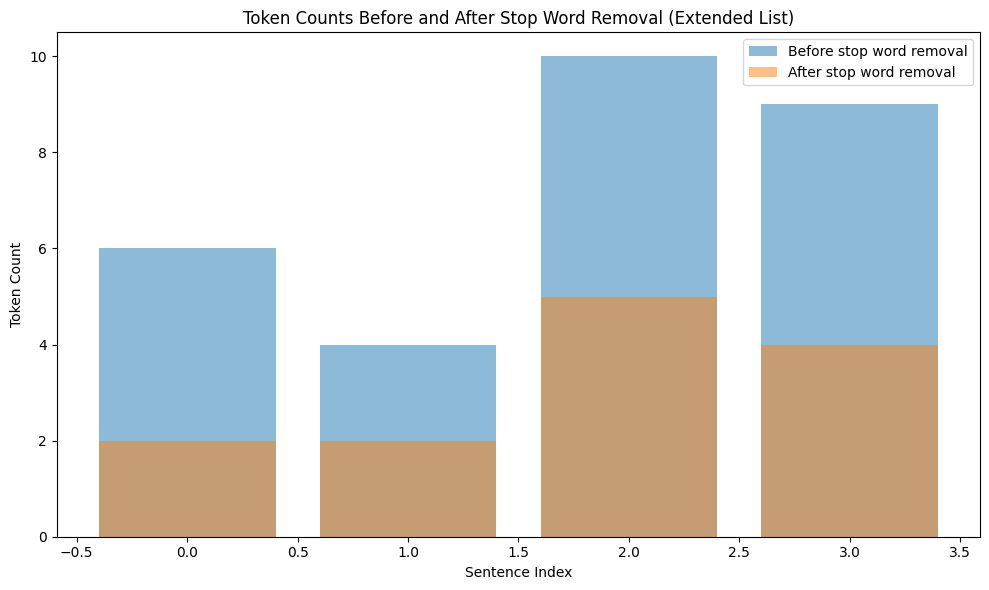

In [68]:
token_counts_before = df['tokens'].apply(len)
token_counts_after = df['filtered_tokens'].apply(len)

plt.figure(figsize=(10, 6))
plt.bar(range(len(df)), token_counts_before, alpha=0.5, label='Before stop word removal')
plt.bar(range(len(df)), token_counts_after, alpha=0.5, label='After stop word removal')
plt.xlabel('Sentence Index')
plt.ylabel('Token Count')
plt.title('Token Counts Before and After Stop Word Removal (Extended List)')
plt.legend()
plt.tight_layout()
plt.show()

We have halved our dataset!! It is exciting to me because this generally means we now need less computational time and resources. (The difference obviously won't be noticeable for our primary text.)

### Stemming
I wanted to do this assignment without using any standard helper libraries.


Therefore, this is a very basic implementation and won't be as effective as established stemmers like Porter or Lancaster.

From my understanding, a stemmer is used to chop of suffixes of the word, and reduce it to it's base form.

In [69]:
def basic_stemmer(word):
    """
    Basic stemmer that removes common suffixes.
    """
    suffixes = ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's']
    for suffix in suffixes:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    return word

def stem_tokens(tokens):
  return [basic_stemmer(token) for token in tokens]

df['stemmed_tokens'] = df['filtered_tokens'].apply(stem_tokens)
df['stemmed_tokens'] .head()

,stemmed_tokens
0,"[student, kccitm]"
1,"[study, fun]"
2,"[career, pursu, btech, outstand, wonderful]"
3,"[work, hard, achieve, goal]"


From what I have read from Porter implementation

https://iq.opengenus.org/porter-stemmer/

https://github.com/nltk/nltk/blob/develop/nltk/stem/porter.py

it pretty much does the thing I did above but it's pre-processing is complex and includes ways of checking **vowels & consonants pattern in a word**, which would be verbose to implement here.

### Lemmatization:

Does the same job as stemming, slowly but arguably more accurately.

In [70]:
lemma_dict = {
    'am': 'be', 'is': 'be', 'are': 'be', 'was': 'be', 'were': 'be',
    'has': 'have', 'have': 'have', 'had': 'have',
    'does': 'do', 'did': 'do',
    'goes': 'go', 'went': 'go',
    'studying': 'study', 'studies': 'study',
    'working': 'work', 'works': 'work',
    'achieving': 'achieve', 'achieves': 'achieve',
    'pursuing': 'pursue', 'pursues': 'pursue',
    'students': 'student',
    'careers': 'career'
}

def simple_lemmatize(word):
    return lemma_dict.get(word, word)

def lemmatize_tokens(tokens):
    return [simple_lemmatize(token) for token in tokens]

df['lemmatized_tokens'] = df['filtered_tokens'].apply(lemmatize_tokens)
df['lemmatized_tokens'].head()

,lemmatized_tokens
0,"[student, kccitm]"
1,"[study, fun]"
2,"[career, pursue, btech, outstanding, wonderful]"
3,"[work, hard, achieve, goal]"


From what I notice, the difference between lemmatization and stemming is

Stemming is fast but less accurate.

Lemmatization is slower but produces valid words.

The main difference is in the third row with "pursue" and "outstanding".

In [71]:
comparison_df = pd.DataFrame({
    'Lemmatized Tokens': df['lemmatized_tokens'],
    'Stemmed Tokens': df['stemmed_tokens']
})

comparison_df.head()

,Lemmatized Tokens,Stemmed Tokens
0,"[student, kccitm]","[student, kccitm]"
1,"[study, fun]","[study, fun]"
2,"[career, pursue, btech, outstanding, wonderful]","[career, pursu, btech, outstand, wonderful]"
3,"[work, hard, achieve, goal]","[work, hard, achieve, goal]"


## Final Output:

In [82]:
def get_significant_tokens(df, column):
    all_tokens = [token for tokens in df[column] for token in tokens]
    return all_tokens

significant_tokens = get_significant_tokens(df, 'lemmatized_tokens')

print("Significant Tokens:", significant_tokens)

Significant Tokens: ['student', 'kccitm', 'study', 'fun', 'career', 'pursue', 'btech', 'outstanding', 'wonderful', 'work', 'hard', 'achieve', 'goal']
